# Lab6 Navis Bayes 应用实践

## 准备数据

### 切分文本成词

In [1]:
# 利用string.split()方法切分文本字符串
mySent = "This book is the best book on Python or M.L. I have ever laid eyes upon."
mySent.split()

['This',
 'book',
 'is',
 'the',
 'best',
 'book',
 'on',
 'Python',
 'or',
 'M.L.',
 'I',
 'have',
 'ever',
 'laid',
 'eyes',
 'upon.']

In [2]:
# 利用正则表达式切分,其中的分隔符是除单词、数字外的任意字符串
import re
regEx = re.compile('\\W+')
listOfTokens = regEx.split(mySent)
listOfTokens

['This',
 'book',
 'is',
 'the',
 'best',
 'book',
 'on',
 'Python',
 'or',
 'M',
 'L',
 'I',
 'have',
 'ever',
 'laid',
 'eyes',
 'upon',
 '']

In [12]:
# 列表推导式的应用
#[tok for tok in listOfTokens if len(tok) > 0]
#[tok.lower() for tok in listOfTokens if len(tok) > 0]
#emailText = open('email/ham/6.txt').read()
#istOfTokens = regEx.split(emailText)

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x92 in position 884: invalid start byte

### 生成词汇表

In [2]:
# 函数 loadDataSet()生成实验样本集
# 函数 createVocabList()建立词汇表
import bayes
listOPost, listClasses = bayes.loadDataSet()
myVocabList = bayes.createVocabList(listOPost)
myVocabList

['my',
 'is',
 'stupid',
 'dalmation',
 'park',
 'ate',
 'steak',
 'maybe',
 'take',
 'mr',
 'food',
 'licks',
 'I',
 'quit',
 'cute',
 'not',
 'please',
 'how',
 'so',
 'stop',
 'him',
 'to',
 'flea',
 'problems',
 'help',
 'love',
 'worthless',
 'buying',
 'garbage',
 'posting',
 'dog',
 'has']

### 生成词向量

In [18]:
# 调用 setOfWords2Vec()函数生成词集向量
# 构建 listOPost 列表 0 位置对应的词集向量
setOfWords2Vec0 = bayes.setOfWords2Vec(myVocabList, listOPost[0])
print(setOfWords2Vec0)
# 构建 listOPost 列表 3 位置对应的词集向量
setOfWords2Vec3 = bayes.setOfWords2Vec(myVocabList, listOPost[3])
print(setOfWords2Vec3)

[0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0]
[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0]


## 训练模型

In [6]:
# 测试 train()函数,返回两个概率向量和一个概率值
# for 循环使用词向量充填 trainMat 列表
trainMat = []
for postinDoc in listOPost:
    trainMat.append(bayes.bagOfWords2Vec (myVocabList, postinDoc))
p0V, p1V, pAb = bayes.train(trainMat, listClasses)
print(pAb)
print(p0V)
print(p1V)

0.5
[0.15384615 0.07692308 0.03846154 0.07692308 0.03846154 0.07692308
 0.07692308 0.03846154 0.03846154 0.07692308 0.03846154 0.07692308
 0.07692308 0.03846154 0.07692308 0.03846154 0.07692308 0.07692308
 0.07692308 0.07692308 0.11538462 0.07692308 0.07692308 0.07692308
 0.07692308 0.07692308 0.03846154 0.03846154 0.03846154 0.03846154
 0.07692308 0.07692308]
[0.04761905 0.04761905 0.19047619 0.04761905 0.0952381  0.04761905
 0.04761905 0.0952381  0.0952381  0.04761905 0.0952381  0.04761905
 0.04761905 0.0952381  0.04761905 0.0952381  0.04761905 0.04761905
 0.04761905 0.0952381  0.0952381  0.0952381  0.04761905 0.04761905
 0.04761905 0.04761905 0.14285714 0.0952381  0.0952381  0.0952381
 0.14285714 0.04761905]


## 测试模型

In [7]:
# spamTest()函数完成测试
bayes.spamTest()

classfication error ['codeine', 'the', 'most', 'competitive', 'price', 'net', 'codeine', 'wilson', '30mg', '156', 'codeine', 'wilson', '30mg', '291', 'freeviagra', 'pills', 'codeine', 'wilson', '30mg', '396', 'freeviagra', 'pills', 'codeine', 'wilson', '30mg', '120', '492', 'freeviagra', 'pills']
classfication error ['home', 'based', 'business', 'opportunity', 'knocking', 'your', 'door', 'don', 'rude', 'and', 'let', 'this', 'chance', 'you', 'can', 'earn', 'great', 'income', 'and', 'find', 'your', 'financial', 'life', 'transformed', 'learn', 'more', 'here', 'your', 'success', 'work', 'from', 'home', 'finder', 'experts']
classfication error ['ordercializviagra', 'online', 'save', '0nline', 'pharmacy', 'noprescription', 'required', 'buy', 'canadian', 'drugs', 'wholesale', 'prices', 'and', 'save', 'fda', 'approved', 'drugs', 'superb', 'quality', 'drugs', 'only', 'accept', 'all', 'major', 'credit', 'cards']
classfication error ['ordercializviagra', 'online', 'save', '0nline', 'pharmacy', 'n

## 操作习题

### 实现验证极大似然估计示例

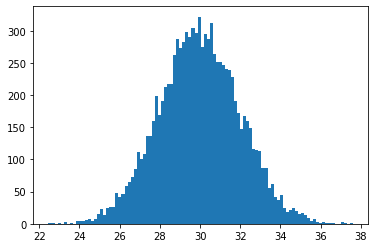

(29.966587271030573, 2.009313274064115)


In [8]:
# 实现极大似然估计
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

μ = 30  # 数学期望
σ = 2  # 方差
x = μ + σ * np.random.randn(10000)  # 正态分布
plt.hist(x, bins=100)  # 直方图显示
plt.show()
print(norm.fit(x))  # 返回极大似然估计，估计出参数约为30和2

### 